In [10]:
import polars as pl
import plotnine as pn

In [64]:
pn.options.figure_size = (10, 4)

In [2]:
pitching = pl.read_csv('./Data/lahman_1871-2023_csv/Pitching.csv') 
pitching.head()

playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
str,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""aardsda01""",2004,1,"""SFN""","""NL""",1,0,11,0,0,0,0,32,20,8,1,10,5,0.417,6.75,0,0,2,0,61,5,8,0,1,1
"""aardsda01""",2006,1,"""CHN""","""NL""",3,0,45,0,0,0,0,159,41,24,9,28,49,0.214,4.08,0,1,1,0,225,9,25,1,3,2
"""aardsda01""",2007,1,"""CHA""","""AL""",2,1,25,0,0,0,0,97,39,23,4,17,36,0.3,6.4,3,2,1,0,151,7,24,2,1,1
"""aardsda01""",2008,1,"""BOS""","""AL""",4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2,3,5,0,228,7,32,3,2,4
"""aardsda01""",2009,1,"""SEA""","""AL""",3,6,73,0,0,0,38,214,49,20,4,34,80,0.19,2.52,3,2,0,0,296,53,23,2,1,2


In [3]:
batting = pl.read_csv('./Data/lahman_1871-2023_csv/Batting.csv') 
batting.head()

playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
str,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str
"""aardsda01""",2004,1,"""SFN""","""NL""",11,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
"""aardsda01""",2006,1,"""CHN""","""NL""",45,null,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,null
"""aardsda01""",2007,1,"""CHA""","""AL""",25,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
"""aardsda01""",2008,1,"""BOS""","""AL""",47,null,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,null
"""aardsda01""",2009,1,"""SEA""","""AL""",73,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null


In [4]:
ERA = (
    pitching
    .select(pl.col('IPouts'), pl.col('yearID'), pl.col('R'), pl.col('lgID'))
    .filter(pl.col('yearID') >= 1946)
    .group_by(pl.col('yearID'), pl.col('lgID'))
    .agg(
        pl.col('R').sum().alias('total_runs'),
        pl.col('IPouts').sum().alias('total_ipouts')
    )
    .with_columns(
        ((pl.col('total_runs') / pl.col('total_ipouts')) * 27).alias('league_ERA')
    )
    .sort(pl.col('yearID'))
)
ERA

yearID,lgID,total_runs,total_ipouts,league_ERA
i64,str,i64,i64,f64
1946,"""AL""",5037,33186,4.098084
1946,"""NL""",4918,33254,3.993084
1947,"""AL""",5161,33228,4.193662
1947,"""NL""",5669,32902,4.652088
1948,"""NL""",5474,32867,4.496851
…,…,…,…,…
2021,"""AL""",11141,64048,4.696587
2022,"""AL""",10215,64676,4.26441
2022,"""NL""",10602,64550,4.434609


In [5]:
ERA_with_DH_Rule = ERA.with_columns(
    pl.when((pl.col('yearID') >= 1973) & (pl.col('lgID') == 'AL'))
    .then(pl.lit("Yes"))
    .when(((pl.col('yearID') == 2020) | (pl.col('yearID') >= 2022)) & (pl.col('lgID') == 'NL'))
    .then(pl.lit("Yes"))
    .otherwise(pl.lit("No"))
    .alias("DH_Rule_Applied")
)
ERA_with_DH_Rule

yearID,lgID,total_runs,total_ipouts,league_ERA,DH_Rule_Applied
i64,str,i64,i64,f64,str
1946,"""AL""",5037,33186,4.098084,"""No"""
1946,"""NL""",4918,33254,3.993084,"""No"""
1947,"""AL""",5161,33228,4.193662,"""No"""
1947,"""NL""",5669,32902,4.652088,"""No"""
1948,"""NL""",5474,32867,4.496851,"""No"""
…,…,…,…,…,…
2021,"""AL""",11141,64048,4.696587,"""Yes"""
2022,"""AL""",10215,64676,4.26441,"""Yes"""
2022,"""NL""",10602,64550,4.434609,"""Yes"""


In [6]:
ERA_with_DH_Rule.write_csv("ERA_with_DH_Rule.csv")

In [7]:
slugging = (
    batting
    .select(pl.col('yearID'),pl.col('lgID'),(pl.col('H') - pl.col('2B') - pl.col('3B') - pl.col('HR')).alias('1B'),pl.col('2B'),pl.col('3B'),pl.col('HR'),pl.col('AB'))
    .filter(pl.col('yearID') >= 1946)
    .group_by(pl.col('yearID'), pl.col('lgID'))
    .agg(
        pl.col('1B').sum().alias('total_1B'),
        pl.col('2B').sum().alias('total_2B'),
        pl.col('3B').sum().alias('total_3B'),
        pl.col('HR').sum().alias('total_HR'),
        pl.col('AB').sum().alias('total_AB'),
    )
    .with_columns(
        ((pl.col('total_1B') + 2 * pl.col('total_2B') + 3 * pl.col('total_3B') + 4 * pl.col('total_HR')) / pl.col('total_AB')).alias('SLG')
    )
    .sort(pl.col('yearID'))
)
slugging

yearID,lgID,total_1B,total_2B,total_3B,total_HR,total_AB,SLG
i64,str,i64,i64,i64,i64,i64,f64
1946,"""AL""",7912,1827,401,653,42239,0.364142
1946,"""NL""",8066,1752,382,562,42094,0.35549
1947,"""AL""",7940,1708,412,679,42002,0.364459
1947,"""NL""",8126,1860,392,886,42434,0.390394
1948,"""AL""",8206,1846,450,710,42155,0.381639
…,…,…,…,…,…,…,…
2021,"""AL""",12630,3956,317,3059,81337,0.414682
2022,"""AL""",13031,3956,295,2557,81816,0.391806
2022,"""NL""",12846,3984,348,2658,81649,0.397923


In [8]:
slugging_with_DH_Rule = slugging.with_columns(
    pl.when((pl.col('yearID') >= 1973) & (pl.col('lgID') == 'AL'))
    .then(pl.lit("Yes"))
    .when(((pl.col('yearID') == 2020) | (pl.col('yearID') >= 2022)) & (pl.col('lgID') == 'NL'))
    .then(pl.lit("Yes"))
    .otherwise(pl.lit("No"))
    .alias("DH_Rule_Applied")
) 
slugging_with_DH_Rule

yearID,lgID,total_1B,total_2B,total_3B,total_HR,total_AB,SLG,DH_Rule_Applied
i64,str,i64,i64,i64,i64,i64,f64,str
1946,"""AL""",7912,1827,401,653,42239,0.364142,"""No"""
1946,"""NL""",8066,1752,382,562,42094,0.35549,"""No"""
1947,"""AL""",7940,1708,412,679,42002,0.364459,"""No"""
1947,"""NL""",8126,1860,392,886,42434,0.390394,"""No"""
1948,"""AL""",8206,1846,450,710,42155,0.381639,"""No"""
…,…,…,…,…,…,…,…,…
2021,"""AL""",12630,3956,317,3059,81337,0.414682,"""Yes"""
2022,"""AL""",13031,3956,295,2557,81816,0.391806,"""Yes"""
2022,"""NL""",12846,3984,348,2658,81649,0.397923,"""Yes"""


In [9]:
slugging_with_DH_Rule.write_csv("slugging_with_DH_Rule.csv")

In [32]:
ERA_with_DH_Rule_mod = (ERA_with_DH_Rule
                         .pivot(values='league_ERA', 
                                index='yearID', 
                                columns='lgID')
                         .with_columns((pl.col('AL') - pl.col('NL')).alias('AL-NL'))
                         .unpivot(['AL', 'NL', 'AL-NL'], 
                              index='yearID', 
                              variable_name='League', 
                              value_name='League ERA')
)

ERA_with_DH_Rule_mod

C:\Users\su6123ck\AppData\Local\Temp\ipykernel_13928\2397643708.py:2: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.


yearID,League,League ERA
i64,str,f64
1946,"""AL""",4.098084
1947,"""AL""",4.193662
1948,"""AL""",4.786844
1949,"""AL""",4.751302
1950,"""AL""",5.133358
…,…,…
2019,"""AL-NL""",0.245273
2020,"""AL-NL""",-0.086749
2021,"""AL-NL""",0.096637


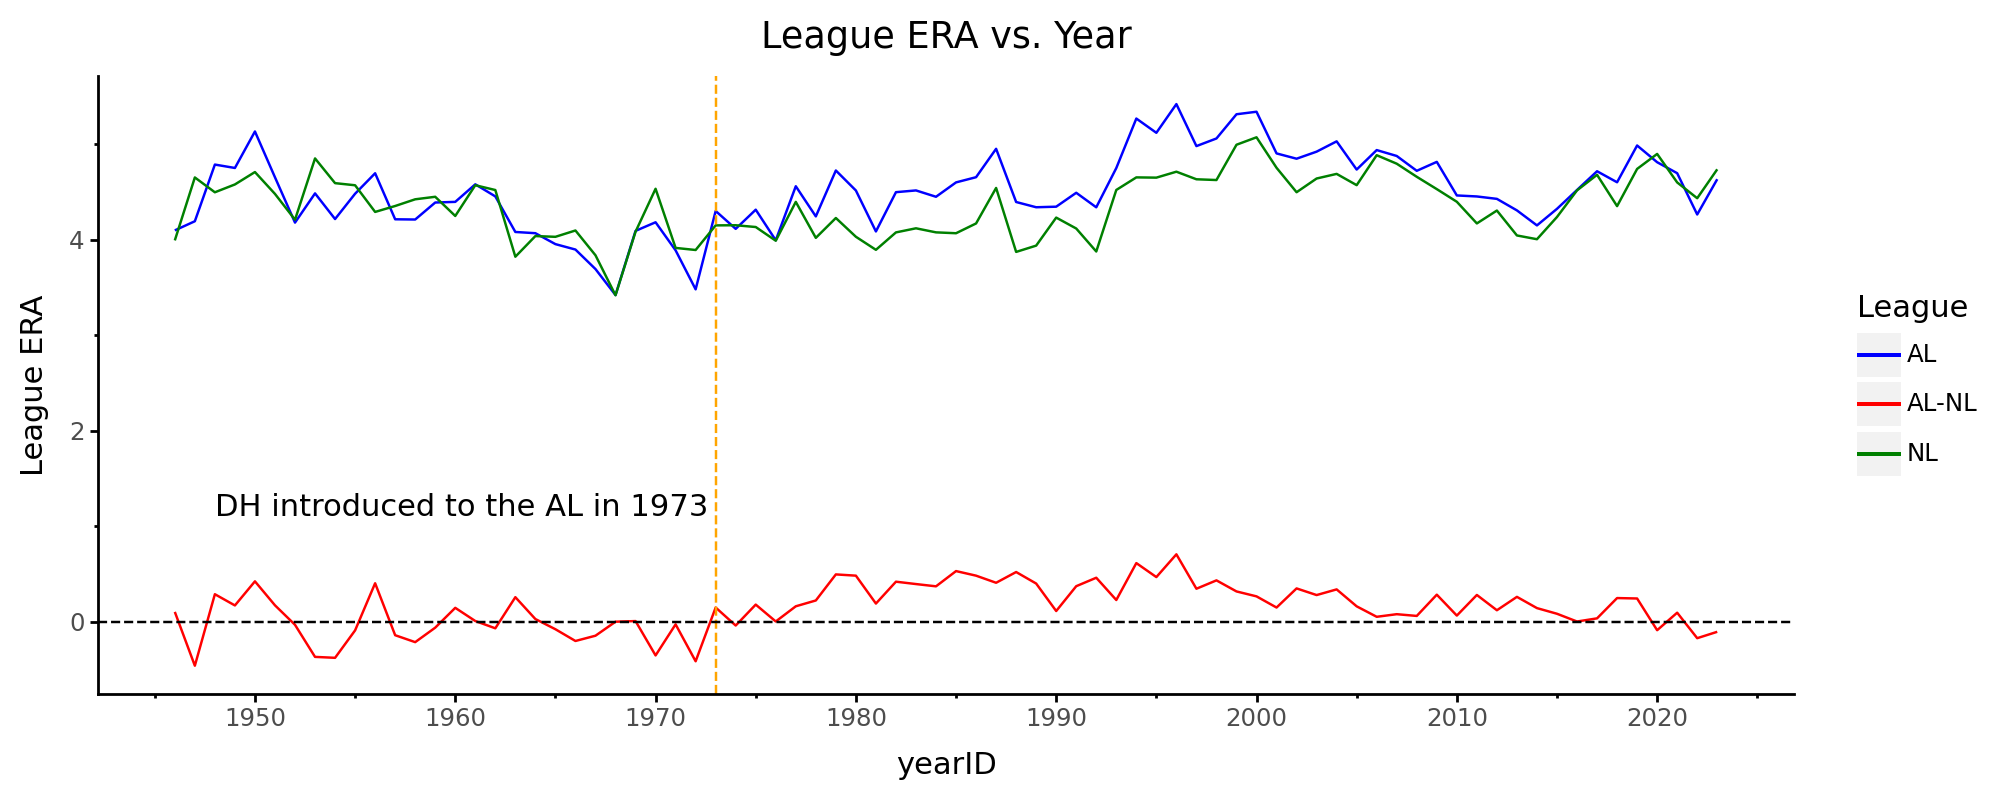

In [80]:
from plotnine import ggplot, geom_line, aes, scale_color_manual, labs, scale_x_continuous, theme, element_blank, element_line, geom_vline, annotate, geom_hline

(ggplot(data=ERA_with_DH_Rule_mod)
 + geom_line(aes(x="yearID",                  
                 y="League ERA",
                 color="League"))
 + scale_color_manual(values={"AL": "blue", "NL": "green", "AL-NL": "red"})
 + labs(title="League ERA vs. Year")
 + scale_x_continuous(breaks=range(1950, max(ERA_with_DH_Rule['yearID']) + 1, 10))
 + theme(
     panel_grid_major=element_blank(),  
     panel_grid_minor=element_blank(),  
     panel_background=element_blank(),   
     axis_line=element_line(color='black'), 
     axis_ticks=element_line(color='black')  
   )
 + geom_vline(xintercept=1973, linetype='dashed', color='orange') 
 + annotate('text', x=1948, y=min(ERA_with_DH_Rule_mod['League ERA']) + 1.5, 
            label='DH introduced to the AL in 1973', 
            color='black', 
            ha='left', 
            va='bottom') 
+ geom_hline(yintercept=0, linetype='dashed', color='black')
)

In [ ]:
from plotnine import ggsave
ggsave(sluggi, filename='./img/slugging_vs_year.png', height=4, width=10, units = 'in', dpi=72)

In [83]:
slugging_with_DH_Rule_mod = (slugging_with_DH_Rule
                         .pivot(values='SLG', 
                                index='yearID', 
                                columns='lgID')
                         .with_columns((pl.col('AL') - pl.col('NL')).alias('AL-NL'))
                         .unpivot(['AL', 'NL', 'AL-NL'], 
                              index='yearID', 
                              variable_name='League', 
                              value_name='Slugging')
)
slugging_with_DH_Rule_mod

C:\Users\su6123ck\AppData\Local\Temp\ipykernel_13928\1326008563.py:2: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.


yearID,League,Slugging
i64,str,f64
1946,"""AL""",0.364142
1947,"""AL""",0.364459
1948,"""AL""",0.381639
1949,"""AL""",0.378867
1950,"""AL""",0.402481
…,…,…
2019,"""AL-NL""",0.008193
2020,"""AL-NL""",-0.006942
2021,"""AL-NL""",0.007854


In [93]:
from plotnine import ggplot, geom_line, aes, scale_color_manual, labs, scale_x_continuous, theme, element_blank, element_line, geom_vline, annotate, geom_hline

slugging = (ggplot(data=slugging_with_DH_Rule_mod)
 + geom_line(aes(x="yearID",                  
                 y="Slugging",
                 color="League"))
 + scale_color_manual(values={"AL": "blue", "NL": "green", "AL-NL": "red"})
 + labs(title="Slugging vs. Year")
 + scale_x_continuous(breaks=range(1950, max(ERA_with_DH_Rule['yearID']) + 1, 10))
 + theme(
     panel_grid_major=element_blank(),  
     panel_grid_minor=element_blank(),  
     panel_background=element_blank(),   
     axis_line=element_line(color='black'), 
     axis_ticks=element_line(color='black')  
   )
 + geom_vline(xintercept=1973, linetype='dashed', color='orange') 
 + annotate('text', x=1948, y=min(ERA_with_DH_Rule_mod['League ERA']) + 0.55, 
            label='DH introduced to the AL in 1973', 
            color='black', 
            ha='left', 
            va='bottom')  
 + geom_hline(yintercept=0, linetype='dashed', color='black')
)

In [98]:
from plotnine import ggsave
ggsave(slugging, filename='./img/slugging_vs_year.png', height=4, width=10, units = 'in', dpi=72)

C:\Users\su6123ck\AppData\Local\anaconda3\envs\polars\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 10 x 4 in image.
C:\Users\su6123ck\AppData\Local\anaconda3\envs\polars\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: ./img/slugging_vs_year.png
